--No graphics will be displayed.



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Jan  9 2025 17:16:28

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

Ca_HVA: gbar_Ca_HVA_somatic = 374.0 uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_HVA: gbar_Ca_HVA_axonal = 306.0 uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_HVA: gbar_Ca_HVA_basal = None uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_HVA: gbar_Ca_HVA_apical = None uS/cm^2, e_Ca_HVA = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_somatic = 778.0 uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_axonal = 50.0 uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_basal = None uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ca_LVAst: gbar_Ca_LVAst_apical = None uS/cm^2, e_Ca_LVAst = 132.4579341637009 mV
Ih: gbar_Ih_somatic = 80.0 uS/cm^2, e_Ih = 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y

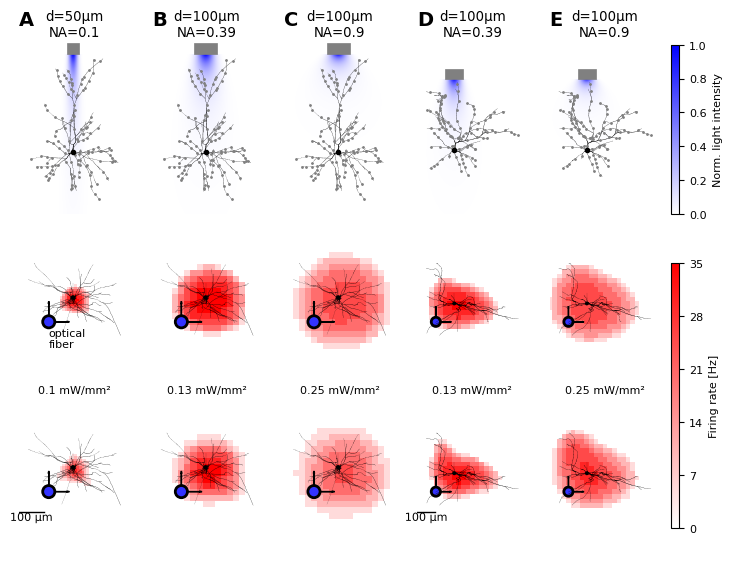

In [1]:
import os
os.chdir('/home/berling/reduce_opto_response/')
from neurostim.analysis import quick_sim_setup
from neurostim.stimulator import Stimulator
import numpy as np
import pandas as pd
from neuron import h
from article_figures.article_plot_functions import plot_morphology_with_light, spatial_activation_plot, map_patt_id_2_xy, label_subplots_ABC
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rc("font", size=8)

load_adex = True

def load_activation(f, power_mW, xy_max, dxy,  f_adex=None, load_adex=False):
    df = pd.read_csv(f, index_col='Unnamed: 0')
    df_full = df.loc[(df.simtype=='full')]
    if load_adex:
        df_tmp = pd.read_csv(f_adex, index_col='Unnamed: 0')
        df_RON = df_tmp.loc[(df_tmp.simtype=='RON_adex')]
    else:
        df_RON = df.loc[(df.simtype=='RON_full')]
    df_full, df_RON = [df.loc[df.norm_power_mW_of_MultiStimulator==power_mW] for df in [df_full, df_RON]]
    # map x,y coordinates on light pattern ids
    df_full = map_patt_id_2_xy(df=df_full, xy_max=xy_max, dxy=dxy, rotate=False)
    df_RON = map_patt_id_2_xy(df=df_RON, xy_max=xy_max, dxy=dxy, rotate=True)
    return df_full, df_RON

############### Plotting
# figure format
a4_w = 8.27
a4_l = 11.7

fig = plt.figure(figsize=(a4_w, a4_w*0.8))
gs = gridspec.GridSpec(3, 5, figure=fig, hspace=0.0)

# Define the subplots based on your description
ax0 = fig.add_subplot(gs[0, 0])  
ax1 = fig.add_subplot(gs[0, 1])  
ax2 = fig.add_subplot(gs[0, 2])  
ax3 = fig.add_subplot(gs[0, 3])  
ax4 = fig.add_subplot(gs[0, 4])  

ax0f = fig.add_subplot(gs[1, 0])  
ax1f = fig.add_subplot(gs[1, 1])  
ax2f = fig.add_subplot(gs[1, 2])  
ax3f = fig.add_subplot(gs[1, 3])  
ax4f = fig.add_subplot(gs[1, 4])  

ax0r = fig.add_subplot(gs[2, 0])  
ax1r = fig.add_subplot(gs[2, 1])  
ax2r = fig.add_subplot(gs[2, 2])  
ax3r = fig.add_subplot(gs[2, 3])  
ax4r = fig.add_subplot(gs[2, 4])  

# col 0, col 1, col 2
# load cell morphology
marklocs=[{'node': 1, 'x': 0.50 }]
locargs=[dict(marker='.', mec='black', mfc='black')]
morph_lw=0.5
sb_width = 1
simcontrol = quick_sim_setup(
    cell_dict = dict(
        cellmodel="L23_PC_cADpyr229_1",
        ChR_soma_density=13e9,
        ChR_distribution='uniform'),
    stimulator_dict = dict(
        diameter_um=50,
        NA=0.1),
)

ax0.set_title('d=50µm\nNA=0.1') 
# calculate light profile d50 NA0.1
soma_depth_cell1 = 423.3559875488281 # copy from printed info at cell initialization
n=2000
xs = np.linspace(-300,300, n)
zs = np.linspace(0,-800, n)
xx, zz = np.meshgrid(xs, zs)
I_d50NA01 = simcontrol.stimulator.calculate_Tx_at_pos(
        pos_xyz_um=[xx,np.zeros(xx.shape),zz], stim_xyz_um=[0,0,0]
)
I_d50NA01 = I_d50NA01 / np.max(I_d50NA01)
plot_morphology_with_light(
    ax=ax0, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=marklocs,
    locargs=locargs,
    morph_lw=morph_lw, 
    light_prof_xx_zz_I=[xx, zz+soma_depth_cell1, I_d50NA01],
    sb_width=sb_width,
    sb_draw=0
)
#add fiber illustration:
rect = patches.Rectangle((-25, soma_depth_cell1), 50, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax0.transData)
fig.add_artist(rect)

ax1.set_title('d=100µm\nNA=0.39')
# calc light profile d100 NA0.39
stimulator = Stimulator(diameter_um=100, NA=0.39)
I_d100NA039 = stimulator.calculate_Tx_at_pos(
        pos_xyz_um=[xx,np.zeros(xx.shape),zz], stim_xyz_um=[0,0,0]
)
I_d100NA039 = I_d100NA039 / np.max(I_d100NA039)
plot_morphology_with_light(
    ax=ax1, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=marklocs,
    locargs=locargs,
    morph_lw=morph_lw, 
    light_prof_xx_zz_I=[xx, zz+soma_depth_cell1, I_d100NA039],
    sb_width=sb_width,
    sb_draw=0
)
#add fiber illustration:
rect = patches.Rectangle((-50, soma_depth_cell1), 100, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax1.transData)
fig.add_artist(rect)

ax2.set_title('d=100µm\nNA=0.9')
# calc light profile d100 NA0.39
stimulator = Stimulator(diameter_um=100, NA=0.9)
I_d100NA09 = stimulator.calculate_Tx_at_pos(
        pos_xyz_um=[xx,np.zeros(xx.shape),zz], stim_xyz_um=[0,0,0]
)
I_d100NA09 = I_d100NA09 /np.max(I_d100NA09)
plot_morphology_with_light(
    ax=ax2, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=marklocs,
    locargs=locargs,
    morph_lw=morph_lw, 
    light_prof_xx_zz_I=[xx, zz+soma_depth_cell1, I_d100NA09],
    sb_width=sb_width,
    sb_draw=0
)
#add fiber illustration:
rect = patches.Rectangle((-50, soma_depth_cell1), 100, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax2.transData)
fig.add_artist(rect)
#reduced morphology
node_data_fpath = 'snake_workflow/simulated_data/RON/L23_PC_cADpyr229_1-cluster_50-cond_scl_0.15-_node_data.npy'
xyz_nodes = np.load(node_data_fpath)[0]
ax0.plot(xyz_nodes[:,0], xyz_nodes[:,2], c='gray', ls='', marker='o', markersize=1, label='reduced')
ax1.plot(xyz_nodes[:,0], xyz_nodes[:,2], c='gray', ls='', marker='o', markersize=1, label='reduced')
ax2.plot(xyz_nodes[:,0], xyz_nodes[:,2], c='gray', ls='', marker='o', markersize=1, label='reduced')

# activation maps ax0, ax1, ax2
# select colorbar max for maps
APCmax=7 # was 7 for RON_full

# rotate cell to get topview simtree:
for node in simcontrol.cell.sim_tree:
    x, y, z = node.xyz
    node.xyz = [x, -1*z, y]
#col0
# load pre-simulated spatial activation maps
power_mW = 0.0002
d_mm = 0.05
df_full, df_RON_full = load_activation(
        f='snake_workflow/result--L23_PC_cADpyr229_1_d50_NA01.csv', 
        f_adex='snake_workflow/adex_result--L23_PC_cADpyr229_1_d50_NA0.1.csv',
        power_mW=power_mW, 
        xy_max=110,
        dxy=10,
        load_adex=load_adex
)
print('APCmax ', df_full.APC.max(), df_RON_full.APC.max())
ax0f, activation_mappable = spatial_activation_plot(
    ax=ax0f,
    df=df_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=True
)
ax0r.set_title(str(np.round(power_mW/(d_mm**2/4*np.pi),2))+ ' mW/mm²', fontsize=8, y=0.9)
ax0r, activation_mappable = spatial_activation_plot(
    ax=ax0r,
    df=df_RON_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=1,
    sb_width=1.,
    label_fiber=False
)

#col1
# load pre-simulated spatial activation maps
power_mW = 0.001
d_mm = 0.1
df_full, df_RON_full = load_activation(
        f='snake_workflow/result--L23_PC_cADpyr229_1_d100_NA0.39.csv', 
        f_adex='snake_workflow/adex_result--L23_PC_cADpyr229_1_d100_NA0.39.csv',
        power_mW=power_mW, 
        xy_max=300,
        dxy=25,
        load_adex=load_adex
)
print('APCmax ', df_full.APC.max(), df_RON_full.APC.max())
ax1f, activation_mappable = spatial_activation_plot(
    ax=ax1f,
    df=df_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)
ax1r.set_title(str(np.round(power_mW/(d_mm**2/4*np.pi),2))+ ' mW/mm²', fontsize=8, y=0.9)
ax1r, activation_mappable = spatial_activation_plot(
    ax=ax1r,
    df=df_RON_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)

#col2
# load pre-simulated spatial activation maps
power_mW = 0.002
d_mm = 0.1
df_full, df_RON_full = load_activation(
        f='snake_workflow/result--L23_PC_cADpyr229_1_d100_NA0.9.csv',
        f_adex='snake_workflow/adex_result--L23_PC_cADpyr229_1_d100_NA0.9.csv',
        power_mW=power_mW, 
        xy_max=300,
        dxy=25,
        load_adex=load_adex
)
print('APCmax ', df_full.APC.max(), df_RON_full.APC.max())
ax2f, activation_mappable = spatial_activation_plot(
    ax=ax2f,
    df=df_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)
ax2r.set_title(str(np.round(power_mW/(d_mm**2/4*np.pi),2))+ ' mW/mm²', fontsize=8, y=0.9)
ax2r, activation_mappable = spatial_activation_plot(
    ax=ax2r,
    df=df_RON_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)


# col 3, col 4
# load cell morphology
simcontrol = quick_sim_setup(
    cell_dict = dict(
        cellmodel="L23_PC_cADpyr229_3_without_mod_loading",
        ChR_soma_density=13e9,
        ChR_distribution='uniform'),
    stimulator_dict = dict(
        diameter_um=50,
        NA=0.1),
)

ax3.set_title('d=100µm\nNA=0.39')
soma_depth_cell2 = 389.3059997558594
plot_morphology_with_light(
    ax=ax3, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=marklocs,
    locargs=locargs,
    morph_lw=morph_lw, 
    light_prof_xx_zz_I=[xx, zz+soma_depth_cell2, I_d100NA039],
    sb_width=sb_width*0.5,
    sb_draw=0
)
#add fiber illustration:
rect = patches.Rectangle((-50, soma_depth_cell2), 100, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax3.transData)
fig.add_artist(rect)

ax4.set_title('d=100µm\nNA=0.9')
plot_morphology_with_light(
    ax=ax4, 
    simtree=simcontrol.cell.sim_tree, 
    marklocs=marklocs,
    locargs=locargs,
    morph_lw=morph_lw, 
    light_prof_xx_zz_I=[xx, zz+soma_depth_cell2, I_d100NA09],
    sb_width=sb_width*0.5,
    sb_draw=0,
    cax=fig.add_axes([
        ax4.get_position().x1+ax4.get_position().width*0.1,
        ax4.get_position().y0,
        0.01,
        ax4.get_position().height,
    ]),
    cbar_kws=dict(label='Norm. light intensity', orientation='vertical')
)
#add fiber illustration:
rect = patches.Rectangle((-50, soma_depth_cell2), 100, 50, linewidth=0.5, edgecolor='gray', facecolor='gray', transform=ax4.transData)
fig.add_artist(rect)
#reduced morphology
node_data_fpath = 'snake_workflow/simulated_data/RON/L23_PC_cADpyr229_3-cluster_50-cond_scl_0.15-_node_data.npy'
xyz_nodes = np.load(node_data_fpath)[0]
ax3.plot(xyz_nodes[:,0], xyz_nodes[:,2], c='gray', ls='', marker='o', markersize=1, label='reduced')
ax4.plot(xyz_nodes[:,0], xyz_nodes[:,2], c='gray', ls='', marker='o', markersize=1, label='reduced')


#col3
# rotate cell to get topview simtree:
for node in simcontrol.cell.sim_tree:
    x, y, z = node.xyz
    node.xyz = [x, -1*z, y]
# load pre-simulated spatial activation maps
power_mW = 0.001
d_mm = 0.1
df_full, df_RON_full = load_activation(
        f='snake_workflow/result--L23_PC_cADpyr229_3_d100_NA0.39.csv', 
        power_mW=power_mW, 
        xy_max=300,
        dxy=25
)
print('APCmax ', df_full.APC.max(), df_RON_full.APC.max())
ax3f, activation_mappable = spatial_activation_plot(
    ax=ax3f,
    df=df_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)
ax3r.set_title(str(np.round(power_mW/(d_mm**2/4*np.pi),2))+ ' mW/mm²', fontsize=8, y=0.9)
ax3r, activation_mappable = spatial_activation_plot(
    ax=ax3r,
    df=df_RON_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=1,
    sb_width=1.,
    label_fiber=False
)

#col4
# load pre-simulated spatial activation maps
power_mW = 0.002
d_mm = 0.1
df_full, df_RON_full = load_activation(
        f='snake_workflow/result--L23_PC_cADpyr229_3_d100_NA0.9.csv', 
        power_mW=power_mW, 
        xy_max=300,
        dxy=25
)
print('APCmax ', df_full.APC.max(), df_RON_full.APC.max())
ax4f, activation_mappable = spatial_activation_plot(
    ax=ax4f,
    df=df_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)
ax4r.set_title(str(np.round(power_mW/(d_mm**2/4*np.pi),2))+ ' mW/mm²', fontsize=8, y=0.9)
ax4r, activation_mappable = spatial_activation_plot(
    ax=ax4r,
    df=df_RON_full,
    APCmax=APCmax,
    cell_topview_simtree = simcontrol.cell.sim_tree,
    morph_lw=0.5,
    shift_x=0,
    sb_draw=0,
    label_fiber=False
)



label_subplots_ABC(
        fig, 
        axs=[ax0, ax1, ax2, ax3, ax4], 
        x_shift=0, 
        y_shift=0.03, 
        fontsize=14, 
        weight='bold'
)
cbar_ax = fig.add_axes([ax4.get_position().x1+ax4.get_position().width*0.1,
                        0.15, 
                        0.01,
                        0.4])
cbar = plt.colorbar(mappable=activation_mappable, cax=cbar_ax, label='Firing rate [Hz]')
ticks = [0, APCmax/5, APCmax*2/5, APCmax*3/5, APCmax*4/5, APCmax]
ticklabels = [ str(int(np.round(tick/0.2,0))) for tick in ticks ]
cbar.set_ticks(ticks, labels=ticklabels) 
fig.savefig('article_figures/figures/article_figure3.png', dpi=300)